# Malicious ClusterScan

Describes/summarizes the or set of clusters. Useful for when you aim to enlist the summarized malware types found in each cluster in order by Type # as presented in VirusTotal such that the first ones on the list per cluster are Type 1 (most popular), followed by Type 2 then Type 3 (least popular).

Note that this notebook only makes use of the verified xxxx_SampleHash_Common.csv file which represents a significant majority of the entire Oliveira dataset.  

## Import Libraries/Datasets

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.rcParams["figure.autolayout"] = True

malicious_df = pd.read_csv('./Labelled_Manual_DBSCAN_SampleHash_Common.csv', low_memory=False, index_col=False) #This should point to a VirusTotal verified <Data Clustering>_SampleHash_Common.csv file

#Load list of API calls
API_LIST = "../api_calls.txt"
DELIMITER = "NaN"
API_FILE = open(API_LIST,"r")
APIS = API_FILE.readline().split(',')
APIS.append(DELIMITER) #serves as a label for NaN values for Instance-based datasets
API_FILE.close()

def list_to_str(ls:list):
    output = ""
    for l in ls:
        output += str(l) + " "
    return output[0:len(output)-1]

def inject_patterns(inner_df:pd.DataFrame):
    patterns = []
    for row in range(inner_df.shape[0]):
        patterns.append(list_to_str(inner_df.iloc[row,2:5].transpose().to_list()))
    inner_df['type_pattern'] = patterns
    return inner_df

def get_unique_clusters(df:pd.DataFrame):
    return list(df['cluster'].unique())

def get_summary(df:pd.DataFrame):
    #Identify the overall list of types each cluster is as designated by VirusTotal.
    unique_clusters = get_unique_clusters(df)
    summary = []
    for u in unique_clusters:
        cluster_sublist = [u]
        df_copy = malicious_df[malicious_df['cluster'] == u].copy(deep=True)
        idx = list(df_copy['Type 1'].value_counts().index)
        counts = list(df_copy['Type 1'].value_counts())
        type_sublist = []
        for i in range(len(idx)):
            type_sublist.append([idx[i], counts[i]])
        cluster_sublist.append(type_sublist)
        # str_summary = []
        # cluster_sublist.append(list(df_copy['type_pattern'].value_counts().index))
        # cluster_sublist.append(list(df_copy['type_pattern'].value_counts()))
        summary.append(cluster_sublist)
    return summary

DELIMITER = "NaN"
API_FILE = open(API_LIST,"r")
APIS = API_FILE.readline().split(',')
APIS.append(DELIMITER) #serves as a label for NaN values for Instance-based datasets
API_FILE.close()

from sklearn.preprocessing import LabelEncoder
#Inverse Label Encoding
def inverse_label(item):
    global APIS
    return item.map(lambda x: APIS[int(x)])
oliveira = pd.read_csv('../oliveira.csv', low_memory=False)
oliveira.iloc[:, 1:101] = oliveira.iloc[:, 1:101].apply(inverse_label, axis=1, result_type='reduce')

def how_many_clusters():
    c = malicious_df['cluster'].unique()
    c.sort()
    display(c.size)

## DataFrame Preview

,cluster,hash,Type 1,Type 2,Type 3,pattern
0,0,071e8c3f8922e186e57548cd4c703a5d,trojan,_,_,"RegOpenKeyExA,NtOpenKey,NtQueryValueKey,NtClos..."
1,1,33f8e6d08a6aae939f25a8e0d63dd523,pua,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."
2,2,b68abd064e975e1c6d5f25e748663076,trojan,_,_,"SetUnhandledExceptionFilter,OleInitialize,LdrL..."
3,-1,72049be7bd30ea61297ea624ae198067,trojan,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."
4,-1,c9b3700a77facf29172f32df6bc77f48,trojan,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
5,-1,cc6217be863e606e49da90fee2252f52,trojan,_,_,"LdrGetProcedureAddress,NtAllocateVirtualMemory..."
6,3,f7a1a3c38809d807b3f5f4cc00b1e9b7,downloader,_,_,"NtClose,NtOpenKey,NtQueryValueKey,NtClose,NtOp..."
7,-1,164b56522eb24164184460f8523ed7e2,adware,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
8,4,56ae1459ba61a14eb119982d6ec793d7,adware,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
9,5,c4148ca91c5246a8707a1ac1fd1e2e36,downloader,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."


(42797, 6)

<Axes: ylabel='Type 1'>

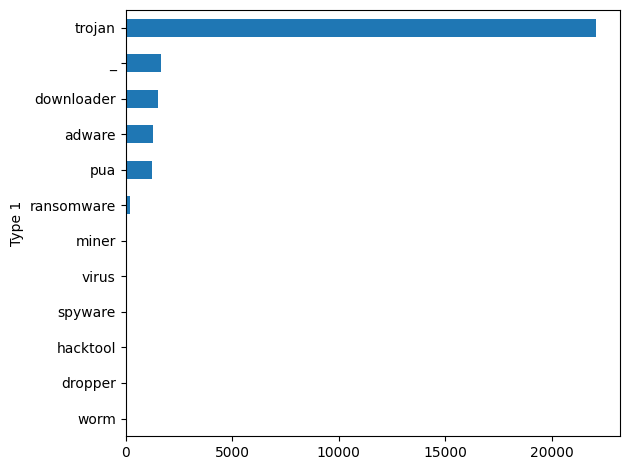

In [57]:
#Replace '-' empty malware type delimiter with '_' for consistency
malicious_df.replace(to_replace='-',value='_', inplace=True)
display(malicious_df.head(10))
display(malicious_df.shape)
malicious_df['Type 1'].value_counts(ascending=True).plot(kind='barh')

In [58]:
#Inject pattern (i.e., summarized malware type pattern) to the DataFrame
malicious_df = inject_patterns(malicious_df)

#Drop row that is falsely labelled. (i.e. '_' on all popularity levels of VirusTotal)
malicious_df.drop(malicious_df[(malicious_df['Type 1']=='_')].index, inplace=True)

In [59]:
# DROP CLUSTERS WITH MORE THAN 1 MALWARE TYPE UNDER IT
# unique_clusters = get_unique_clusters(malicious_df)
# for u in unique_clusters:
#     if len(malicious_df[malicious_df['cluster'] == u]['Type 1'].unique()) > 1:
#         malicious_df = malicious_df.drop(malicious_df[malicious_df['cluster'] == u].index)
# malicious_df.head()

## How many clusters are there?

In [60]:
how_many_clusters()

600

## "What Malware Types can be found in the overall dataset?"

### This is regardless of cluster.

Type 1
trojan        22082
downloader     1514
adware         1288
pua            1234
ransomware      227
miner            90
virus            55
spyware          32
hacktool          9
dropper           4
worm              1
Name: count, dtype: int64

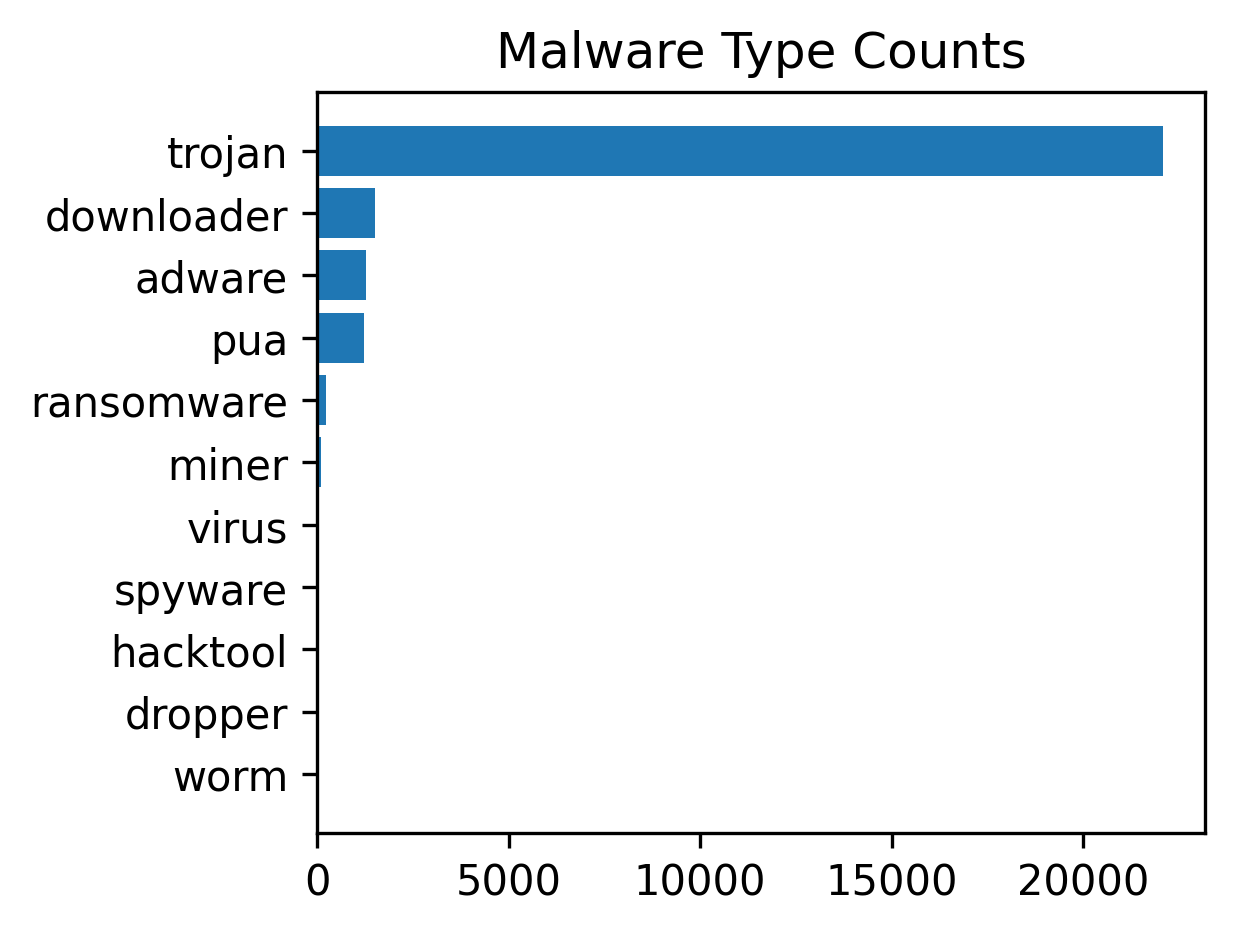

In [61]:
output = malicious_df['Type 1'].value_counts()
str_output = str(output) + "\n\n"
with open("./Output/1 MalwareTypes_in_Dataset.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
display(output)
fig, axs = plt.subplots(nrows=1, layout='constrained')
fig.set_figwidth(4)
fig.set_figheight(3)
fig.set_dpi(300)
axs.set_title('Malware Type Counts')
axs.barh(malicious_df['Type 1'].value_counts().index, malicious_df['Type 1'].value_counts())
axs.invert_yaxis()
# axs[1].set_title('Type 2 Malware Type Counts')
# axs[1].invert_yaxis()
# axs[1].barh(malicious_df['Type 2'].value_counts().index, malicious_df['Type 2'].value_counts())
# axs[2].invert_yaxis()
# axs[2].set_title('Type 3 (Least \'Popular\') Malware Type Counts')
# axs[2].barh(malicious_df['Type 3'].value_counts().index, malicious_df['Type 3'].value_counts())
plt.savefig("./Output/1 Popular Malware Types in Dataset.png")

In [62]:
#DROP ROWS WITH NA TO HAVE CLEAN CLUSTERS
import numpy as nan
malicious_df.dropna(inplace=True, subset=['Type 1'])
malicious_df['Type 1'].unique()

array(['trojan', 'pua', 'downloader', 'adware', 'hacktool', 'miner',
       'virus', 'spyware', 'ransomware', 'dropper', 'worm'], dtype=object)

## How many clusters are there?

In [63]:
c = malicious_df['cluster'].unique()
c.sort()
display(c.size)

584

## "What Malware Types are there in each cluster?"


### Identify the counts of Malware Types per Cluster

This indicates the malware types (including the # of instances) found in each cluster.

In [64]:
str_output = ""
summary = get_summary(malicious_df)
summary.sort()
for s in summary:
    str_output += f"CLUSTER {s[0]}: "
    for t in s[1]:
        str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tType 2: "
    # for t in s[2]:
    #     str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tType 3: "
    # for t in s[3]:
    #     str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tMost Popular Malware Type Combination (in order Most to Least):\n"
    # for i,t in enumerate(s[4]):
    #     str_output += f"\t    {i+1} {t:12s} ({s[5][i]})\n"
    str_output += "\n"
with open("./Output/1 MalwareType_per_Cluster.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
print(str_output)

CLUSTER -1: trojan (7325); adware (474); pua (392); downloader (55); miner (51); virus (41); ransomware (23); hacktool (6); spyware (6); worm (1); 
CLUSTER 0: trojan (2133); spyware (1); adware (1); 
CLUSTER 1: pua (60); trojan (18); adware (5); downloader (4); 
CLUSTER 2: trojan (5); 
CLUSTER 3: downloader (98); trojan (9); adware (3); virus (1); 
CLUSTER 4: trojan (262); adware (25); pua (1); 
CLUSTER 5: downloader (617); pua (61); adware (15); trojan (12); 
CLUSTER 6: trojan (9); adware (3); virus (2); downloader (2); pua (2); hacktool (1); 
CLUSTER 7: trojan (9); 
CLUSTER 8: trojan (232); adware (5); pua (1); 
CLUSTER 9: trojan (16); 
CLUSTER 10: trojan (9); 
CLUSTER 11: trojan (450); adware (15); pua (2); 
CLUSTER 12: trojan (341); adware (39); pua (2); 
CLUSTER 13: trojan (95); downloader (71); pua (30); adware (23); dropper (1); 
CLUSTER 14: trojan (674); adware (7); spyware (2); 
CLUSTER 15: trojan (22); 
CLUSTER 16: trojan (305); downloader (1); 
CLUSTER 17: trojan (41); downl

### Identify the Clusters that have the same Unique Malware Type

This indicates what clusters have verified malicious samples that match specific Malware Types.

This indicates the most occuring Malware Type which extends to the most 'popular' malware type that is probably found in the dataset.

Such findings may also be used as a reflection as to what malware types are most prevalent in the wild.

In [65]:
# Summarize Clusters that have the same malware types as per VirusTotal.
str_output = f"# of Unique Malware Type: {len(malicious_df['Type 1'].unique())}" + "\n\n"

cluster_instance_summary = [0] * len(list(malicious_df['cluster'].unique()))
count_summary = []
for i, u in enumerate(list(malicious_df['Type 1'].unique())):
    matching = malicious_df[malicious_df['Type 1'] == u]['cluster']
    count_summary.append([u, len(list(matching)), len(list(matching.unique())) ,str(list(matching.unique()))])
    str_output += f"Unique Malware Type: {i+1}".upper() + "\n"
    str_output += f"Malware Type: {u}" + "\n"
    str_output += f"Matching Clusters Count: {len(list(matching.unique()))}" + "\n"
    str_output += f"Matching Clusters: {list(matching.unique())}" + "\n"
    str_output += "\n"
with open("./Output/1 Clusters_on_Unique_MalwareType.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
print(str_output)

count_summary.sort(key=lambda x: x[1])
count_summary = pd.DataFrame(count_summary, columns=['Malware Type', 'No. of Matching Verified Samples', 'No. of Matching Clusters', "Matching Clusters"])

count_summary.sort_values(by='No. of Matching Clusters',ascending=False, inplace=True)
display("Top 10 Most Common Malware Type (by Cluster Count)")
display(count_summary[['Malware Type','No. of Matching Clusters', 'Matching Clusters']].iloc[0:10])
count_summary[['Malware Type','No. of Matching Clusters', 'Matching Clusters']].iloc[0:10].to_csv("./Output/1 10_Most_Common_MalwareType_byClusterCount.csv", index=False)

# of Unique Malware Type: 11

UNIQUE MALWARE TYPE: 1
Malware Type: trojan
Matching Clusters Count: 536
Matching Clusters: [0, 2, -1, 7, 8, 9, 10, 11, 12, 14, 15, 16, 18, 20, 21, 22, 23, 17, 24, 25, 27, 28, 4, 29, 30, 32, 33, 34, 35, 36, 37, 38, 1, 39, 41, 42, 44, 45, 46, 47, 48, 49, 51, 53, 31, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 19, 84, 85, 87, 88, 89, 90, 54, 91, 93, 94, 95, 96, 97, 99, 103, 104, 105, 106, 107, 109, 110, 112, 115, 116, 117, 120, 124, 125, 127, 128, 129, 130, 132, 133, 135, 136, 140, 141, 142, 143, 144, 145, 146, 102, 131, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 160, 161, 13, 163, 164, 165, 167, 168, 169, 171, 172, 173, 174, 175, 176, 177, 181, 182, 183, 184, 179, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 201, 202, 203, 204, 205, 206, 207, 209, 210, 212, 213, 214, 216, 217, 218, 219, 220, 221, 222, 223, 225, 226, 227, 228, 230, 231, 232, 236, 237, 238, 239, 240, 241, 242, 243

'Top 10 Most Common Malware Type (by Cluster Count)'

,Malware Type,No. of Matching Clusters,Matching Clusters
10,trojan,536,"[0, 2, -1, 7, 8, 9, 10, 11, 12, 14, 15, 16, 18..."
8,adware,142,"[-1, 4, 31, 50, 13, 83, 86, 108, 121, 134, 138..."
7,pua,117,"[1, -1, 19, 26, 54, 55, 66, 17, 92, 113, 114, ..."
9,downloader,39,"[3, 5, 17, -1, 13, 43, 63, 82, 108, 111, 119, ..."
5,miner,17,"[-1, 137, 62, 27, 420, 123, 372, 326, 444, 102..."
4,virus,10,"[52, -1, 3, 6, 179, 54, 98, 353, 211, 131]"
3,spyware,8,"[57, 0, 14, 104, -1, 396, 522, 431]"
6,ransomware,7,"[100, 101, 96, -1, 266, 329, 102]"
2,hacktool,4,"[6, -1, 354, 348]"
1,dropper,3,"[141, 13, 434]"


## "What the API Calls are in each Malware Type"

In [66]:
malware_types = count_summary['Malware Type'].to_list()
malware_apis = []

pd.set_option("display.max_rows", None)

print("Top 10 API CALLS (HIGHEST) PER MALWARE TYPE")
for m in malware_types:
    hashes = malicious_df[malicious_df['Type 1'] == m]['hash'].to_list()
    complete = []
    for h in hashes:
        complete += oliveira[oliveira['hash']==h].iloc[0,1:101].to_list()
    ser = pd.Series(complete, name=m)
    ser.value_counts().to_csv(f"./Output/1_APICALL_{m}.csv")
    malware_apis.append(ser.unique().tolist())
    display(ser.value_counts())

Top 10 API CALLS (HIGHEST) PER MALWARE TYPE


trojan
LdrGetProcedureAddress               363427
LdrLoadDll                           215966
LdrGetDllHandle                      144346
RegOpenKeyExW                        136672
LoadResource                         113862
FindResourceExW                      111642
NtClose                              106444
RegQueryValueExW                      97029
RegCloseKey                           88395
NtAllocateVirtualMemory               83052
NtQueryValueKey                       52993
NtOpenKey                             52101
GetSystemMetrics                      47324
GetSystemTimeAsFileTime               40346
SetErrorMode                          23479
GetSystemInfo                         21026
NtProtectVirtualMemory                18361
NtDelayExecution                      17732
RegQueryInfoKeyW                      16977
NtCreateFile                          15702
DrawTextExW                           15398
LoadStringW                           15076
NtFreeVirtualMemory      

adware
LdrGetProcedureAddress               21685
LdrLoadDll                           12415
LdrGetDllHandle                      10751
NtClose                               7572
RegOpenKeyExW                         7301
RegCloseKey                           6486
NtAllocateVirtualMemory               5758
RegQueryValueExW                      5342
SetErrorMode                          3631
NtOpenKey                             3135
NtQueryValueKey                       2914
GetSystemTimeAsFileTime               2128
NtCreateFile                          1987
GetSystemWindowsDirectoryW            1730
GetSystemDirectoryW                   1658
LoadResource                          1558
NtMapViewOfSection                    1482
GetSystemMetrics                      1381
NtReadFile                            1313
RegOpenKeyExA                         1306
NtFreeVirtualMemory                   1304
FindResourceExW                       1246
NtCreateSection                       1143
SetF

pua
LdrGetProcedureAddress               23235
LdrLoadDll                           12548
LdrGetDllHandle                      11970
NtClose                               7704
NtAllocateVirtualMemory               6337
RegOpenKeyExW                         5240
RegCloseKey                           4783
RegQueryValueExW                      3468
SetErrorMode                          3446
NtOpenKey                             2723
NtQueryValueKey                       2529
GetSystemMetrics                      2000
NtReadFile                            1919
SetFilePointer                        1877
NtCreateFile                          1864
LoadResource                          1656
NtFreeVirtualMemory                   1593
GetSystemWindowsDirectoryW            1561
NtMapViewOfSection                    1548
FindResourceExW                       1537
GetSystemDirectoryW                   1422
GetSystemTimeAsFileTime               1371
NtProtectVirtualMemory                1193
NtCreat

downloader
LdrGetProcedureAddress               40699
LdrGetDllHandle                      26217
LdrLoadDll                           13260
RegCloseKey                           9002
RegOpenKeyExW                         7944
NtAllocateVirtualMemory               7221
RegQueryValueExW                      6018
NtClose                               5785
FindResourceExW                       4127
LoadResource                          4111
RegOpenKeyExA                         2443
GetSystemTimeAsFileTime               1965
NtOpenKey                             1853
NtQueryValueKey                       1730
RegQueryValueExA                      1706
NtFreeVirtualMemory                   1645
GetSystemWindowsDirectoryW            1331
GetSystemMetrics                      1327
SetErrorMode                          1114
NtMapViewOfSection                    1007
SetUnhandledExceptionFilter            881
LoadStringW                            865
NtCreateFile                           794


miner
LdrGetProcedureAddress               843
NtClose                              737
LdrLoadDll                           510
LdrGetDllHandle                      413
NtCreateFile                         353
RegOpenKeyExW                        353
NtQueryAttributesFile                353
RegCloseKey                          326
NtAllocateVirtualMemory              315
NtMapViewOfSection                   288
NtCreateSection                      272
RegQueryValueExW                     257
NtUnmapViewOfSection                 234
NtOpenKey                            220
NtReadFile                           216
SetFilePointer                       203
NtQueryValueKey                      190
GetSystemWindowsDirectoryW           163
LoadResource                         161
GetSystemTimeAsFileTime              152
LdrUnloadDll                         148
GetSystemDirectoryW                  147
GetSystemInfo                        128
FindResourceExW                      100
NtFreeVirt

virus
LdrGetProcedureAddress               725
LdrLoadDll                           438
NtClose                              423
RegCloseKey                          310
LdrGetDllHandle                      292
RegOpenKeyExW                        273
NtReadFile                           269
NtAllocateVirtualMemory              243
NtWriteFile                          201
RegQueryValueExW                     188
NtOpenKey                            129
NtCreateFile                         124
LoadResource                         124
FindResourceExW                      122
NtQueryValueKey                      116
SetFilePointer                       103
NtFreeVirtualMemory                   77
RegOpenKeyExA                         75
GetSystemWindowsDirectoryW            71
SetErrorMode                          70
GetSystemMetrics                      62
NtMapViewOfSection                    62
FindFirstFileExW                      49
NtCreateSection                       47
NtDuplicat

spyware
LdrGetProcedureAddress               517
FindResourceExW                      401
LoadResource                         354
LdrGetDllHandle                      267
LdrLoadDll                           264
NtClose                              147
GetSystemMetrics                     138
NtAllocateVirtualMemory              136
RegCloseKey                           93
LoadStringA                           79
NtQueryValueKey                       69
NtOpenKey                             62
RegOpenKeyExA                         60
RegOpenKeyExW                         54
DrawTextExW                           45
NtCreateFile                          33
RegQueryValueExW                      32
RegQueryValueExA                      31
NtCreateSection                       31
GetSystemInfo                         30
GetSystemWindowsDirectoryW            29
NtMapViewOfSection                    27
GetSystemDirectoryW                   27
NtFreeVirtualMemory                   25
NtQueryA

ransomware
NtQuerySystemInformation      5272
NtAllocateVirtualMemory       3639
NtFreeVirtualMemory           3270
NtClose                       1439
LdrGetProcedureAddress         945
RegOpenKeyExW                  751
RegCloseKey                    736
RegQueryValueExW               733
NtOpenKey                      545
NtQueryValueKey                491
LdrLoadDll                     475
LdrGetDllHandle                466
NtCreateFile                   455
NtMapViewOfSection             423
NtCreateSection                422
CreateThread                   302
NtCreateMutant                 230
NtOpenFile                     228
CryptAcquireContextW           221
NtQueryInformationFile         220
GetSystemWindowsDirectoryW     219
NtDelayExecution               212
GetFileSize                    209
GetTempPathW                   208
CreateToolhelp32Snapshot        90
Process32NextW                  83
Process32FirstW                 83
NtWriteFile                     33
GetFileAt

hacktool
NtClose                        123
LdrGetProcedureAddress          87
LdrLoadDll                      61
FindFirstFileExW                48
NtAllocateVirtualMemory         44
NtCreateFile                    37
LdrGetDllHandle                 35
SetFilePointer                  29
NtReadFile                      28
RegCloseKey                     27
NtQueryValueKey                 21
RegOpenKeyExW                   21
SetErrorMode                    19
NtMapViewOfSection              19
NtOpenKey                       19
NtFreeVirtualMemory             18
RegQueryValueExW                17
GetSystemMetrics                16
GetSystemDirectoryW             15
NtCreateSection                 14
NtQueryAttributesFile           13
NtOpenFile                      12
GetSystemWindowsDirectoryW      11
RegOpenKeyExA                   11
NtWriteFile                      9
GetFileSize                      9
LoadResource                     7
LoadStringA                      7
CreateDirec

dropper
LdrGetProcedureAddress               51
LdrLoadDll                           45
SetErrorMode                         34
RegOpenKeyExW                        32
RegCloseKey                          29
LdrGetDllHandle                      29
NtClose                              27
RegQueryValueExW                     25
NtOpenKey                            14
NtQueryValueKey                      14
GetSystemWindowsDirectoryW           13
NtAllocateVirtualMemory              12
GetSystemDirectoryW                   9
NtCreateFile                          7
NtMapViewOfSection                    6
NtQueryAttributesFile                 6
LoadStringW                           6
NtCreateSection                       5
NtCreateMutant                        4
GetNativeSystemInfo                   4
RegOpenKeyExA                         3
NtFreeVirtualMemory                   3
GetSystemTimeAsFileTime               3
CreateActCtxW                         3
SetUnhandledExceptionFilter     

worm
SetErrorMode               21
LdrGetProcedureAddress     15
LdrLoadDll                 13
NtAllocateVirtualMemory    10
GetFileAttributesW          4
NtQueryValueKey             4
NtClose                     3
LoadStringA                 3
NtDelayExecution            3
RegOpenKeyExA               3
NtProtectVirtualMemory      3
LdrGetDllHandle             3
GetSystemMetrics            3
FindResourceExW             2
NtOpenKey                   1
SearchPathW                 1
GetSystemInfo               1
NtFreeVirtualMemory         1
SetWindowsHookExA           1
LookupPrivilegeValueW       1
CoCreateInstanceEx          1
OleInitialize               1
NtOpenFile                  1
NtQueryInformationFile      1
Name: count, dtype: int64

## "What the Unique API Calls are in each Malware Type"

In [67]:
for i,m in enumerate(malware_types):
    print(i, m)
    m_list = malware_apis[i]
    for j in range(len(malware_apis)):
        if j != i:
            for k in m_list[:]:
                if k in malware_apis[j]:
                    m_list.remove(k)
    print(m_list)
    print("\n")

0 trojan
['SetStdHandle', 'GlobalMemoryStatus', 'CryptProtectData', 'CryptEncrypt', 'GetAdaptersAddresses', 'GetBestInterfaceEx', 'GetVolumePathNameW', 'StartServiceW', 'GetFileInformationByHandle', 'GetSystemWindowsDirectoryA', 'InternetGetConnectedState', 'HttpSendRequestA', 'InternetCloseHandle', 'CreateServiceW', 'RtlRemoveVectoredExceptionHandler', 'UnhookWindowsHookEx', 'CreateRemoteThread', 'InternetQueryOptionA', 'EnumServicesStatusA', 'NtSuspendThread', 'RegisterHotKey', 'GetKeyboardState', 'RtlDecompressBuffer', 'WSASocketW', 'Module32FirstW', 'Module32NextW', 'NtQueueApcThread', 'SetFileInformationByHandle', 'GetFileInformationByHandleEx', 'GetAddrInfoW', 'DnsQuery_A', 'RegDeleteValueA', 'InternetSetStatusCallback', 'InternetReadFile', 'HttpQueryInfoA', 'ObtainUserAgentString', 'InternetOpenUrlA', 'InternetOpenUrlW', 'NetUserGetInfo']


1 adware
['RegQueryInfoKeyA', 'RegEnumKeyExA', 'GetComputerNameA', 'DrawTextExA', 'OpenServiceW', 'CryptAcquireContextA', 'HttpOpenRequestA'